# SP23-BAI-050
# SYED AHMAD ALI

# PyTorch ANN's CLASSIFICATION
# DataSet: MNIST (Modified National Institute of Standards and Technology)

# Import Statements

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as raw_dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset ,DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Compilation of Data

1- Loading the dataset

2- Extract images (X) and labels (y) from the dataset

3- Converting them to NumPy arrays

4- Normalizing the data

5- Flatten the images (convert 28x28 images into 784-dimensional vectors)

6- Converting to PyTorch tensors

In [3]:
def CompilingData():
    dataset = raw_dataset.MNIST(root="./data", train=True, download=True)

    X = dataset.data
    y = dataset.targets

    print("X Shape:", X.shape)
    print("X:", X)

    X = X.numpy()
    y = y.numpy()

    X = X / 255.0
    X = (X - 0.5) / 0.5

    X = X.reshape(X.shape[0], -1)

    print("X_Flaten Shape:", X.shape)
    print("X_Flaten:", X)

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    print("X_tensor Shape: ", X.shape)
    print("y_tensor Shape: ", y.shape)
    
    return X, y

# Training The Model

1- Initialization of DataLoader

2-  Starting the training Over each Batch

3-  Updating the weights and biases of the model using backpropagation

4-  Computing average loss for the epoch

In [4]:
def train_model(model, data, batch_size, n_epoch, loss_fn, optimizer):
    train_loader = DataLoader(dataset=data, batch_size=batch_size, shuffle=True)
    epoch_losses = []
    batch_losses = []
    
    for epoch in range(n_epoch):
        for x_batch, y_batch in train_loader:
            model.train()
            yhat = model(x_batch)
            loss = loss_fn(yhat, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())  # Store batch loss
        
        avg_loss = sum(batch_losses) / len(batch_losses)
        epoch_losses.append(avg_loss)  # Store epoch-level loss
        print(f"Epoch {epoch+1}, Average Loss: {avg_loss}")

    return epoch_losses

# Evaluation functions for the Model

1- Evaluating the model on the test dataset

2-  Seting the model to evaluation mode

3-  Disabling gradient computation

4- Calculating the predictions

5- Calculating Accuracy

6- Generating confusion matrix

7- Generating classification report for precision, recall, and F1-score

In [5]:
def evaluate_with_metrics(model, data, batch_size, loss_fn):
    test_loader = DataLoader(dataset=data, batch_size=batch_size, shuffle=False)
    all_predictions = []
    all_labels = []
    total_loss = 0
    
    model.eval()  
    with torch.no_grad():  
        for x_batch, y_batch in test_loader:
            yhat = model(x_batch)
            loss = loss_fn(yhat, y_batch)
            total_loss += loss.item()
            
            _, predictions = torch.max(yhat, 1)
            all_predictions.extend(predictions.cpu().numpy())  # Store predictions
            all_labels.extend(y_batch.cpu().numpy())  # Store true labels
    
    accuracy = (sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)) * 100
    avg_loss = total_loss / len(test_loader)
    
    cm = confusion_matrix(all_labels, all_predictions)
    
    report = classification_report(all_labels, all_predictions, digits=4)
    
    return accuracy, avg_loss, cm, report

# Making Class for the Model

1- Defining the model architecture

2- Initializing the weights and biases using Xavier initialization

3- Forward pass through the model


# Purpose of Xavier Initialization

Without proper initialization, weights can grow too large (exploding gradients) or shrink to near-zero (vanishing gradients) as they propagate deep through layers.

Xavier initialization ensures the variance of activations remains constant across layers, preventing these issues.

# Why No Explicit Softmax with CrossEntropyLoss?


CrossEntropyLoss internally combines the Softmax function and the negative log-likelihood (NLL) loss.

When you pass raw logits (unscaled outputs from your model) to CrossEntropyLoss, it first applies Softmax to convert them into probabilities and then calculates the loss.

# Double Application of Softmax:

If you explicitly apply Softmax in your model and then use CrossEntropyLoss, you're applying Softmax twice, which will distort the loss calculation and lead to incorrect results.



In [6]:
class CustomClassificationModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, output_size):
        super(CustomClassificationModel, self).__init__()
        self.W1 = torch.randn(input_size, hidden_size1, requires_grad=True)
        self.b1 = torch.randn(hidden_size1, requires_grad=True)
        self.W2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
        self.b2 = torch.randn(hidden_size2, requires_grad=True)
        self.W3 = torch.randn(hidden_size2, hidden_size3, requires_grad=True)
        self.b3 = torch.randn(hidden_size3, requires_grad=True)
        self.W4 = torch.randn(hidden_size3, hidden_size4, requires_grad=True)
        self.b4 = torch.randn(hidden_size4, requires_grad=True)
        self.W5 = torch.randn(hidden_size4, hidden_size5, requires_grad=True)
        self.b5 = torch.randn(hidden_size5, requires_grad=True)
        self.W6 = torch.randn(hidden_size5, output_size, requires_grad=True)
        self.b6 = torch.randn(output_size, requires_grad=True)
        
        torch.nn.init.xavier_normal_(self.W1)
        torch.nn.init.xavier_normal_(self.W2)
        torch.nn.init.xavier_normal_(self.W3)
        torch.nn.init.xavier_normal_(self.W4)
        torch.nn.init.xavier_normal_(self.W5)
        torch.nn.init.xavier_normal_(self.W6)
    
    def forward(self, input_data):
        hidden1 = torch.relu((input_data @ self.W1 + self.b1))
        hidden2 = torch.relu((hidden1 @ self.W2 + self.b2))
        hidden3 = torch.relu((hidden2 @ self.W3 + self.b3))
        hidden4 = torch.relu((hidden3 @ self.W4 + self.b4))
        hidden5 = torch.relu((hidden4 @ self.W5 + self.b5))
        output = hidden5 @ self.W6 + self.b6

        return output

# Main function

1- Compiling the data

2- Splitting the dataset into training and testing sets

3- Creating Tensor dataset

4- Creating a custom classification model

5- Converting training dataset in Tensor Dataset

6- Initializing the Optimizer

7- Training the model

In [7]:
X, y = CompilingData()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

input = 784
hidden_size1 = 200
hidden_size2 = 170
hidden_size3 = 140
hidden_size4 = 90
hidden_size5 = 50
output_size = 10
learning_rate = 0.01
batch_size = 50
epochs = 20

model = CustomClassificationModel(input_size=input, hidden_size1=hidden_size1, hidden_size2=hidden_size2, hidden_size3=hidden_size3, hidden_size4=hidden_size4, hidden_size5=hidden_size5, output_size=output_size)
train_dataset = TensorDataset(X_train, y_train)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD([model.W1, model.b1, model.W2, model.b2, model.W3, model.b3, model.W4, model.b4, model.W5, model.b5, model.W6, model.b6],lr=learning_rate)
epoch_loses = train_model(model=model, data=train_dataset, batch_size=batch_size, n_epoch=epochs, loss_fn=loss_fn, optimizer=optimizer)

X Shape: torch.Size([60000, 28, 28])
X: tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
       

# Ploting The Loss Reduction during training

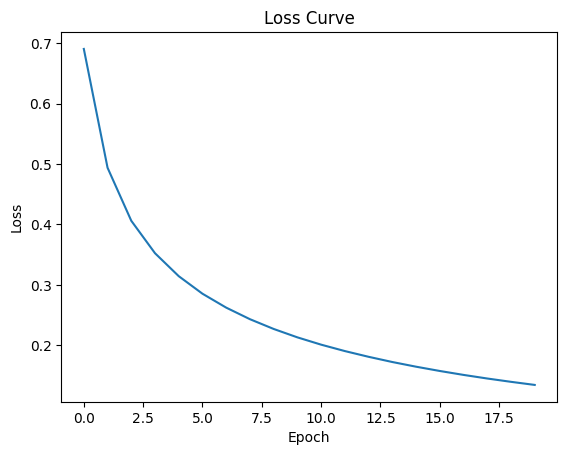

In [8]:
plt.plot(range(epochs), epoch_loses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Testing the Model

1- Displaying results

2- Ploting and Displaying confusion matrix

3- Displaying Classification Report

Test Accuracy: 97.17%
Test Loss: 0.0926

Confusion Matrix:
[[1155    0    7    0    2    2    3    1    2    3]
 [   0 1307    7    1    3    0    2    2    0    0]
 [   0    5 1153    1    0    0    1   11    2    1]
 [   0    1   18 1172    1   11    1    6    5    4]
 [   0    1    3    0 1142    0    7   10    0   13]
 [   2    1    5   13    3 1061    7    4    4    4]
 [   3    0    5    0    3    2 1162    0    2    0]
 [   1    4   11    0    0    0    0 1278    1    4]
 [   4    4   11   21    5    5    4    3 1093   10]
 [   3    2    1    4   15    3    0   25    3 1138]]


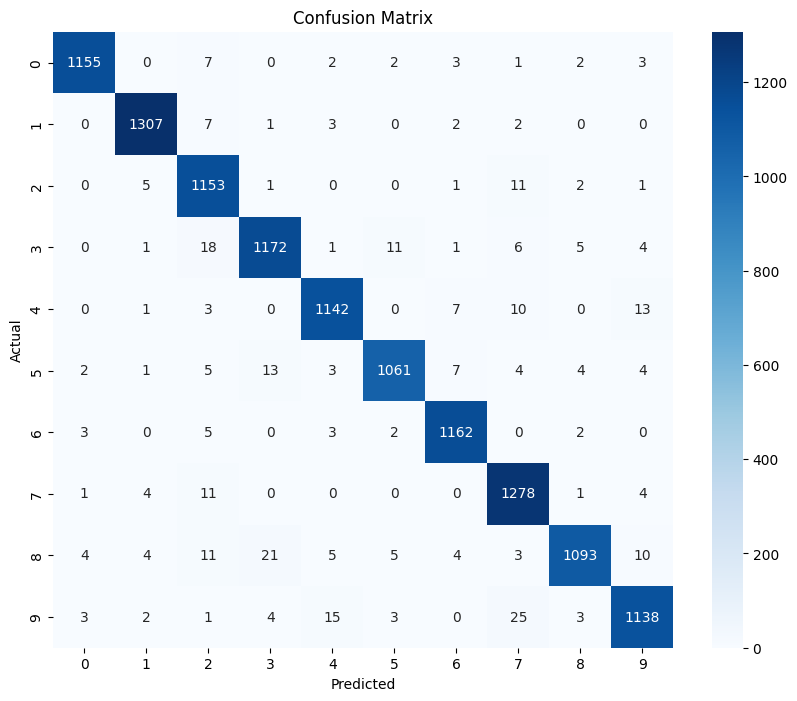


Classification Report:
              precision    recall  f1-score   support

           0     0.9889    0.9830    0.9859      1175
           1     0.9864    0.9887    0.9875      1322
           2     0.9443    0.9821    0.9628      1174
           3     0.9670    0.9614    0.9642      1219
           4     0.9727    0.9711    0.9719      1176
           5     0.9788    0.9611    0.9698      1104
           6     0.9789    0.9873    0.9831      1177
           7     0.9537    0.9838    0.9685      1299
           8     0.9829    0.9422    0.9621      1160
           9     0.9669    0.9531    0.9599      1194

    accuracy                         0.9718     12000
   macro avg     0.9721    0.9714    0.9716     12000
weighted avg     0.9720    0.9718    0.9717     12000



In [9]:

test_dataset = TensorDataset(X_test, y_test)
accuracy, avg_loss, cm, report = evaluate_with_metrics(model=model, data=test_dataset, batch_size=batch_size, loss_fn=loss_fn)

print(f"Test Accuracy: {accuracy:.2f}%")
print(f"Test Loss: {avg_loss:.4f}")
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(report)